<a href="https://colab.research.google.com/github/14marcos1/ELT574_51687_ATIVIDADE_1_/blob/main/Spotify1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [4]:
from google.colab import files
uploaded = files.upload()

Saving musicas_spotify_limpo.csv to musicas_spotify_limpo (1).csv


In [5]:
df = pd.read_csv("musicas_spotify_limpo.csv")
df.head()


,danceability,energy,loudness,tempo,valence
0,0.786,0.667,-8.272,102.046,0.688
1,0.571,0.739,-11.163,93.105,0.818
2,0.286,0.929,-8.494,99.762,0.127
3,0.725,0.607,-7.486,129.971,0.570
4,0.184,0.161,-18.261,86.351,0.087


In [6]:
features = ["danceability", "energy", "loudness", "tempo", "valence"]

df_sp = df[features].copy()

# garante numérico e remove linhas inválidas
df_sp = df_sp.apply(pd.to_numeric, errors="coerce").dropna()

df_sp.describe()


,danceability,energy,loudness,tempo,valence
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.561148,0.635062,-8.069284,120.699930,0.488802
std,0.178634,0.242053,4.429160,31.233957,0.257159
min,0.109000,0.003770,-40.046000,63.047000,0.035900
25%,0.438750,0.487000,-9.510000,94.986750,0.279000
50%,0.579500,0.680000,-6.834500,115.235000,0.477500
75%,0.694250,0.830500,-5.206500,141.933250,0.696250
max,0.936000,0.997000,-2.228000,200.082000,0.973000


In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df_sp)


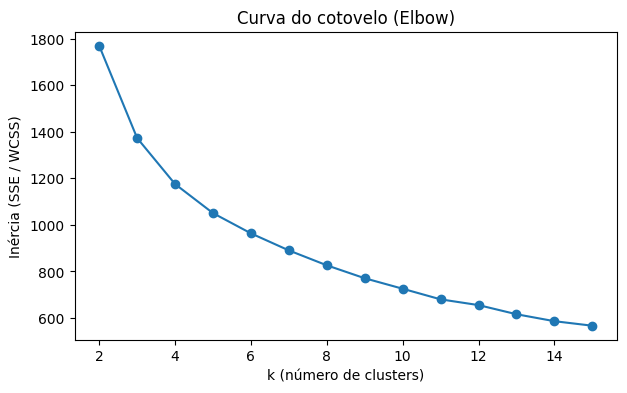

In [11]:
ks = range(2, 16)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(list(ks), inertias, marker="o")
plt.xlabel("k (número de clusters)")
plt.ylabel("Inércia (SSE / WCSS)")
plt.title("Curva do cotovelo (Elbow)")
plt.show()


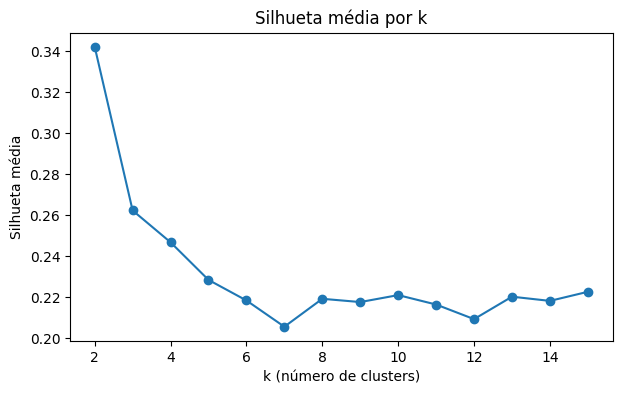

2

In [12]:
sil_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.figure(figsize=(7,4))
plt.plot(list(ks), sil_scores, marker="o")
plt.xlabel("k (número de clusters)")
plt.ylabel("Silhueta média")
plt.title("Silhueta média por k")
plt.show()

best_k = list(ks)[int(np.argmax(sil_scores))]
best_k


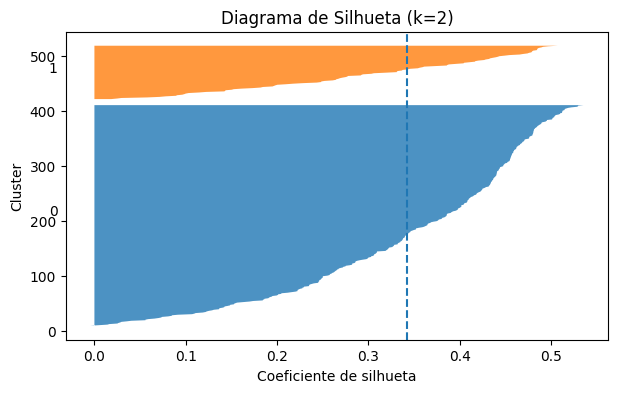

In [13]:
def silhouette_plot(X, labels, k):
    sil_vals = silhouette_samples(X, labels)
    y_lower = 10

    plt.figure(figsize=(7,4))
    for i in range(k):
        ith = sil_vals[labels == i]
        ith.sort()
        size_i = ith.shape[0]
        y_upper = y_lower + size_i
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith, alpha=0.8)
        plt.text(-0.05, y_lower + 0.5*size_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(np.mean(sil_vals), linestyle="--")
    plt.xlabel("Coeficiente de silhueta")
    plt.ylabel("Cluster")
    plt.title(f"Diagrama de Silhueta (k={k})")
    plt.show()

kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_best = kmeans_best.fit_predict(X)

silhouette_plot(X, labels_best, best_k)


In [14]:
df_result = df_sp.copy()
df_result["cluster"] = labels_best

df_result.head()


,danceability,energy,loudness,tempo,valence,cluster
0,0.786,0.667,-8.272,102.046,0.688,0
1,0.571,0.739,-11.163,93.105,0.818,0
2,0.286,0.929,-8.494,99.762,0.127,0
3,0.725,0.607,-7.486,129.971,0.570,0
4,0.184,0.161,-18.261,86.351,0.087,1


In [17]:
perfil = df_result.groupby("cluster")[features].mean()
perfil



,danceability,energy,loudness,tempo,valence
cluster,,,,,
0,0.597634,0.724699,-6.527378,122.810251,0.546569
1,0.411480,0.267369,-14.394245,112.043306,0.251841


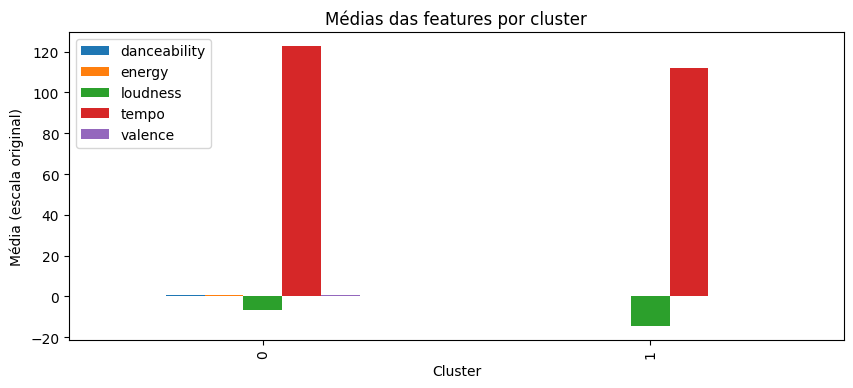

In [18]:
import matplotlib.pyplot as plt

perfil.plot(kind="bar", figsize=(10,4))
plt.title("Médias das features por cluster")
plt.xlabel("Cluster")
plt.ylabel("Média (escala original)")
plt.show()
